In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML2.2%20real%20classification/data/diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
y = data.Outcome
X = data.drop(["Outcome"], axis=1)
y.shape, X.shape

((768,), (768, 8))

In [7]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X, y)


C:\Users\nshel\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [8]:
print("Coefficients: \n", logistic.coef_[0])

Coefficients: 
 [ 1.17252335e-01  3.35998487e-02 -1.40873749e-02 -1.27047668e-03
 -1.24032186e-03  7.72023323e-02  1.41904173e+00  1.00353577e-02]


In [9]:
_ = [print(k, v) for k, v in zip(X.columns, logistic.coef_[0])]

Pregnancies 0.1172523348332452
Glucose 0.033599848707685266
BloodPressure -0.014087374934364008
SkinThickness -0.0012704766792320317
Insulin -0.0012403218611000562
BMI 0.07720233226390713
DiabetesPedigreeFunction 1.419041726560337
Age 0.010035357687248218


In [10]:
print("Intercept: \n", logistic.intercept_)

Intercept: 
 [-7.70291417]


In [11]:
y_pred = logistic.predict(X)
_ = [print(a, b) for a, b in list(zip(y, y_pred))[:10]]

1 1
0 0
1 1
0 0
1 1
0 0
1 0
0 1
1 1
1 0


<Axes: >

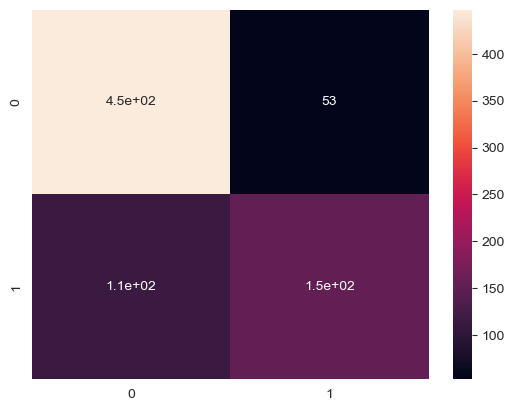

In [12]:
from sklearn import metrics
metrics.confusion_matrix(y, y_pred)
import seaborn as sns
sns.heatmap(metrics.confusion_matrix(y, y_pred), annot=True)


In [13]:
logistic.score(X, y)

0.7825520833333334

In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
poly = poly.fit_transform(X)
poly

array([[1.00000e+00, 6.00000e+00, 1.48000e+02, ..., 3.93129e-01,
        3.13500e+01, 2.50000e+03],
       [1.00000e+00, 1.00000e+00, 8.50000e+01, ..., 1.23201e-01,
        1.08810e+01, 9.61000e+02],
       [1.00000e+00, 8.00000e+00, 1.83000e+02, ..., 4.51584e-01,
        2.15040e+01, 1.02400e+03],
       ...,
       [1.00000e+00, 5.00000e+00, 1.21000e+02, ..., 6.00250e-02,
        7.35000e+00, 9.00000e+02],
       [1.00000e+00, 1.00000e+00, 1.26000e+02, ..., 1.21801e-01,
        1.64030e+01, 2.20900e+03],
       [1.00000e+00, 1.00000e+00, 9.30000e+01, ..., 9.92250e-02,
        7.24500e+00, 5.29000e+02]], shape=(768, 45))

In [28]:
polynomial = LogisticRegression()
polynomial.fit(poly, y)
y_pred_poly = polynomial.predict(poly)

ValueError: Found input variables with inconsistent numbers of samples: [768, 150]

**Задание 1.** Изучите документацию sklearn, посвященную классу LogisticRegression. Какую еще информацию можно вывести для обученной модели? Попробуйте изменить аргументы при создании модели и посмотрите, как это влияет на качество предсказания.

Дополнительные метрики:

logistic.get_params() — Получение текущих параметров модели.
logistic.predict_proba(X) — Предсказание вероятностей для классов

Изменение параметров, например, использование 'l1' вместо 'l2' для регуляризации, может повлиять на качество предсказания, а также скорость обучения.

In [16]:
print("Model parameters:", logistic.get_params())
print("Predicted probabilities:", logistic.predict_proba(X)[:5])

logistic = LogisticRegression(penalty='l1', C=0.5, solver='liblinear', max_iter=200)
logistic.fit(X, y)
print("Coefficients after adjustments: \n", logistic.coef_[0])
print("Accuracy with adjustments: ", logistic.score(X, y))


Model parameters: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Predicted probabilities: [[0.28902477 0.71097523]
 [0.94446072 0.05553928]
 [0.17424631 0.82575369]
 [0.95494394 0.04505606]
 [0.04791233 0.95208767]]
Coefficients after adjustments: 
 [ 0.1177681   0.03246157 -0.01449254  0.00092807 -0.00094447  0.07761908
  0.69365917  0.01231233]
Accuracy with adjustments:  0.7786458333333334


**Задание 2.**Попробуйте применить к той же задаче другие модели классификации. Для каждой из них выведите матрицу классификации и оценку точности. Рекомендуется исследовать следующие модели:

Метод опорных векторов

Без ядра

С линейным ядром

С гауссовым ядром

С полиномиальным ядром

Метод ближайших соседей

Многослойный перцептрон

Дерево решений

Наивный байесовский классификатор

(*) Другие методы:

Пассивно-агрессивный классификатор

Гребневый классификатор

Случайный лес

Беггинг

Другие модели по желанию

In [17]:
#Метод опорных векторов с разными ядрами
from sklearn.svm import SVC
svc_no_kernel = SVC(kernel='linear')
svc_no_kernel.fit(X, y)
y_pred_svc_no_kernel = svc_no_kernel.predict(X)
print("SVC (no kernel) Confusion Matrix:")
print(metrics.confusion_matrix(y, y_pred_svc_no_kernel))
print("Accuracy:", svc_no_kernel.score(X, y))

svc_linear = SVC(kernel='linear')
svc_linear.fit(X, y)
y_pred_svc_linear = svc_linear.predict(X)
print("SVC (linear kernel) Confusion Matrix:")
print(metrics.confusion_matrix(y, y_pred_svc_linear))
print("Accuracy:", svc_linear.score(X, y))

svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X, y)
y_pred_svc_rbf = svc_rbf.predict(X)
print("SVC (RBF kernel) Confusion Matrix:")
print(metrics.confusion_matrix(y, y_pred_svc_rbf))
print("Accuracy:", svc_rbf.score(X, y))

svc_poly = SVC(kernel='poly')
svc_poly.fit(X, y)
y_pred_svc_poly = svc_poly.predict(X)
print("SVC (Poly kernel) Confusion Matrix:")
print(metrics.confusion_matrix(y, y_pred_svc_poly))
print("Accuracy:", svc_poly.score(X, y))


SVC (no kernel) Confusion Matrix:
[[443  57]
 [114 154]]
Accuracy: 0.77734375
SVC (linear kernel) Confusion Matrix:
[[443  57]
 [114 154]]
Accuracy: 0.77734375
SVC (RBF kernel) Confusion Matrix:
[[457  43]
 [135 133]]
Accuracy: 0.7682291666666666
SVC (Poly kernel) Confusion Matrix:
[[465  35]
 [137 131]]
Accuracy: 0.7760416666666666


In [18]:
#Метод ближайших соседей
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X, y)
y_pred_knn = knn.predict(X)
print("KNN Confusion Matrix:")
print(metrics.confusion_matrix(y, y_pred_knn))
print("Accuracy:", knn.score(X, y))


KNN Confusion Matrix:
[[442  58]
 [ 93 175]]
Accuracy: 0.8033854166666666


In [19]:
#Многослойный перцептрон
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=1000)
mlp.fit(X, y)
y_pred_mlp = mlp.predict(X)
print("MLP Confusion Matrix:")
print(metrics.confusion_matrix(y, y_pred_mlp))
print("Accuracy:", mlp.score(X, y))


MLP Confusion Matrix:
[[444  56]
 [122 146]]
Accuracy: 0.7682291666666666


In [20]:
#Дерево решений
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X, y)
y_pred_dt = dt.predict(X)
print("Decision Tree Confusion Matrix:")
print(metrics.confusion_matrix(y, y_pred_dt))
print("Accuracy:", dt.score(X, y))


Decision Tree Confusion Matrix:
[[500   0]
 [  0 268]]
Accuracy: 1.0


In [21]:
#Наивный байесовский классификатор
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X, y)
y_pred_nb = nb.predict(X)
print("Naive Bayes Confusion Matrix:")
print(metrics.confusion_matrix(y, y_pred_nb))
print("Accuracy:", nb.score(X, y))


Naive Bayes Confusion Matrix:
[[421  79]
 [103 165]]
Accuracy: 0.7630208333333334


In [22]:
#Пассивно-агрессивный классификатор
from sklearn.linear_model import PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=1000)
pac.fit(X, y)
y_pred_pac = pac.predict(X)
print("Passive-Aggressive Confusion Matrix:")
print(metrics.confusion_matrix(y, y_pred_pac))
print("Accuracy:", pac.score(X, y))


Passive-Aggressive Confusion Matrix:
[[  6 494]
 [  2 266]]
Accuracy: 0.3541666666666667


In [23]:
#Гребневый классификатор
from sklearn.linear_model import RidgeClassifier
ridge = RidgeClassifier()
ridge.fit(X, y)
y_pred_ridge = ridge.predict(X)
print("Ridge Classifier Confusion Matrix:")
print(metrics.confusion_matrix(y, y_pred_ridge))
print("Accuracy:", ridge.score(X, y))


Ridge Classifier Confusion Matrix:
[[447  53]
 [114 154]]
Accuracy: 0.7825520833333334


In [24]:
#Случайный лес
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X, y)
y_pred_rf = rf.predict(X)
print("Random Forest Confusion Matrix:")
print(metrics.confusion_matrix(y, y_pred_rf))
print("Accuracy:", rf.score(X, y))


Random Forest Confusion Matrix:
[[500   0]
 [  0 268]]
Accuracy: 1.0


In [25]:
#Беггинг
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier()
bagging.fit(X, y)
y_pred_bagging = bagging.predict(X)
print("Bagging Confusion Matrix:")
print(metrics.confusion_matrix(y, y_pred_bagging))
print("Accuracy:", bagging.score(X, y))


Bagging Confusion Matrix:
[[497   3]
 [ 14 254]]
Accuracy: 0.9778645833333334


**Задание 3.** Напишите функцию, которая автоматически обучает все перечисленные модели и для каждой выдает оценку точности.

In [26]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import PassiveAggressiveClassifier, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score

def train_and_evaluate_models(X, y):
    # Словарь моделей
    models = {
        "SVC (no kernel)": SVC(kernel='linear'),
        "SVC (linear kernel)": SVC(kernel='linear'),
        "SVC (RBF kernel)": SVC(kernel='rbf'),
        "SVC (Poly kernel)": SVC(kernel='poly'),
        "KNN": KNeighborsClassifier(),
        "MLP": MLPClassifier(max_iter=1000),
        "Decision Tree": DecisionTreeClassifier(),
        "Naive Bayes": GaussianNB(),
        "Passive-Aggressive": PassiveAggressiveClassifier(max_iter=1000),
        "Ridge Classifier": RidgeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "Bagging": BaggingClassifier()
    }

    # Обучаем каждую модель и выводим точность
    for model_name, model in models.items():
        model.fit(X, y)
        y_pred = model.predict(X)
        accuracy = accuracy_score(y, y_pred)
        print(f"{model_name} - Accuracy: {accuracy:.4f}")

# Пример вызова функции с использованием данных X и y
train_and_evaluate_models(X, y)


SVC (no kernel) - Accuracy: 0.7773
SVC (linear kernel) - Accuracy: 0.7773
SVC (RBF kernel) - Accuracy: 0.7682
SVC (Poly kernel) - Accuracy: 0.7760
KNN - Accuracy: 0.8034
MLP - Accuracy: 0.7591
Decision Tree - Accuracy: 1.0000
Naive Bayes - Accuracy: 0.7630
Passive-Aggressive - Accuracy: 0.6562
Ridge Classifier - Accuracy: 0.7826
Random Forest - Accuracy: 1.0000
Bagging - Accuracy: 0.9883


**Задание 4.** Повторите полностью анализ для другой задачи - распознавание вида ириса по параметрам растения (можно использовать метод sklearn.datasets.load_iris()).

In [27]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import PassiveAggressiveClassifier, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score

# Загружаем данные о ирисах
iris = datasets.load_iris()
X = iris.data  # Признаки
y = iris.target  # Целевая переменная (виды ирисов)

def train_and_evaluate_models(X, y):
    # Словарь моделей
    models = {
        "SVC (no kernel)": SVC(kernel='linear'),
        "SVC (linear kernel)": SVC(kernel='linear'),
        "SVC (RBF kernel)": SVC(kernel='rbf'),
        "SVC (Poly kernel)": SVC(kernel='poly'),
        "KNN": KNeighborsClassifier(),
        "MLP": MLPClassifier(max_iter=1000),
        "Decision Tree": DecisionTreeClassifier(),
        "Naive Bayes": GaussianNB(),
        "Passive-Aggressive": PassiveAggressiveClassifier(max_iter=1000),
        "Ridge Classifier": RidgeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "Bagging": BaggingClassifier()
    }

    # Обучаем каждую модель и выводим точность
    for model_name, model in models.items():
        model.fit(X, y)
        y_pred = model.predict(X)
        accuracy = accuracy_score(y, y_pred)
        print(f"{model_name} - Accuracy: {accuracy:.4f}")

# Пример вызова функции с использованием данных X и y
train_and_evaluate_models(X, y)


SVC (no kernel) - Accuracy: 0.9933
SVC (linear kernel) - Accuracy: 0.9933
SVC (RBF kernel) - Accuracy: 0.9733
SVC (Poly kernel) - Accuracy: 0.9733
KNN - Accuracy: 0.9667
MLP - Accuracy: 0.9733
Decision Tree - Accuracy: 1.0000
Naive Bayes - Accuracy: 0.9600
Passive-Aggressive - Accuracy: 0.7267
Ridge Classifier - Accuracy: 0.8533
Random Forest - Accuracy: 1.0000
Bagging - Accuracy: 1.0000
